In [516]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import *
from scipy import integrate
sp.init_printing(use_latex='mathjax') # Importamos el módulo de latex para imprimir con notación matemática.

In [517]:
sp.init_printing(use_latex='mathjax')
y = sp.Symbol("y")
x = sp.Symbol("x")

m = sp.Symbol("m")
g = sp.Symbol("g")
k = sp.Symbol("k")


f = ((-k*y - m*g) / (m))

sp.Eq(0, f)
#sp.solve(((-k*y - m*g) / (m)))



    -g⋅m - k⋅y
0 = ──────────
        m     

In [518]:
sp.solve(f,y)

⎡-g⋅m ⎤
⎢─────⎥
⎣  k  ⎦

In [519]:
sp.solveset(f, y, domain=sp.S.Reals)

    ⎧-g⋅m ⎫
ℝ ∩ ⎨─────⎬
    ⎩  k  ⎭

In [520]:
x = sp.Symbol('x', real=True)
y = sp.Function('y')

g = 9.8
m = 1
k = 1


Eq = sp.diff(y(x),x)+ ((k*y(x) + m*g) / (m))
Eq

       d             
y(x) + ──(y(x)) + 9.8
       dx            

In [521]:
sp.dsolve(Eq, ics={y(0):0})

                   -x
y(x) = -9.8 + 9.8⋅ℯ  

In [522]:
x = sp.Symbol('x', real=True)
y = sp.Symbol('y')

g = 9.8
m = 1
k = 1

f =((-(k*y) - (m*g)) / (m))

sp.Eq(0, f)
sp.solve(f,y)

[-9.8]

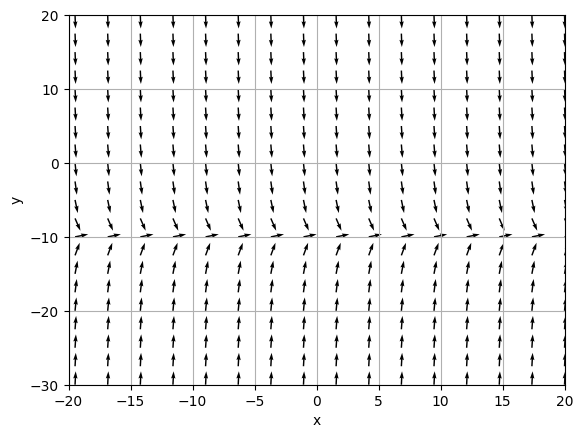

In [523]:
# definimos las variables a analizar y su intervalo a analizar con meshgrid y linspace de numpy
X,Y=np.meshgrid(np.linspace(-30,20,20), np.linspace(-30,20,21)) # Formato de linspace es (limite izquierdo, limite derecho, {opcional: cantidad de puntos})

U = 1.0
V = ((-k*Y - m*g) / (m)) #f(x,y), definimos la edo

N = np.sqrt(U ** 2 + V ** 2)# Normalizamos los vectores, ya que queremos saber los sentidos, no queremos los largos de los vectores
# al obtener la normalizacion se debe de dividir con los vectores, para asi terminar con la normalizacion
U = U / N
V = V / N

# invocamos plt para graficar los vectores
plt.quiver(X, Y, U, V) #graficamos los vectores con origen en (x,y) y término en la normalizacion (u,v)
plt.xlim([-20,20]) #limites en eje x
plt.ylim([-30,20]) #limites en eje y

plt.xlabel('x') #etiqueta eje x
plt.ylabel('y') #etiqueta eje y
plt.grid()# para establecer red en la región

# mostramos el grafico
plt.show()

In [524]:
x = sp.Symbol('x', real=True)
y = sp.Symbol('y')

g = 9.8
m = 1
k = 1

f = ((-k*y**2 - m*g) / (m))
f

   2      
- y  - 9.8

In [525]:
sp.solve(f,y)

[-3.13049516849971⋅ⅈ, 3.13049516849971⋅ⅈ]

In [526]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
x = sp.Symbol('x', real=True)
y = sp.Function('y')

sp.init_printing(use_latex='mathjax') 

def RK4(f, x0, xn, y0, n):
    X = np.linspace(x0,xn,n+1)
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0
    h = (xn-x0)/n     
    for i in range(n):
        K1=f(X[i],Y[i]) 
        K2=f(X[i]+h/2,Y[i]+(h/2)*K1) 
        K3=f(X[i]+h/2,Y[i]+(h/2)*K2) 
        K4=f(X[i]+h,Y[i]+h*K3)
        Y[i+1] = Y[i] +(h/6)*(K1+2*K2+2*K3+K4)
    return Y

In [527]:
def Euler(f,x0,xn,y0,n): #nuestra función se llama Euler y sus datos de entrada son f,x0,xn,y0,n
    X = np.linspace(x0,xn,n+1)         
    Y = np.linspace(x0,xn,n+1)                 
    Y[0] = y0
    h=(xn-x0)/n
    for i in range(n):
        Y[i+1] = Y[i] + h*f(X[i],Y[i])
    return Y

In [528]:
p = 100
v = 0.002
A = 0.25
c = 900
h = 20
e = 0.85
o = 5.67 * 10**-8

def g(x,y): return  ((A/(p*c*v))*(e*o*((20 + 273)**4 - (y + 273)**4) + h*(20 - y)))


In [529]:
euler = Euler(g,0.5,10,250,3600)[-1]
euler

np.float64(171.13113915965602)

In [530]:
p = 100
v = 0.002
A = 0.25
c = 900
h = 0
e = 0.85
o = 1

def g(x,y): return  ((A/(p*c*v))*(e*o*((20 + 273)**4 - (y + 273)**4) + h*(20 - y)))

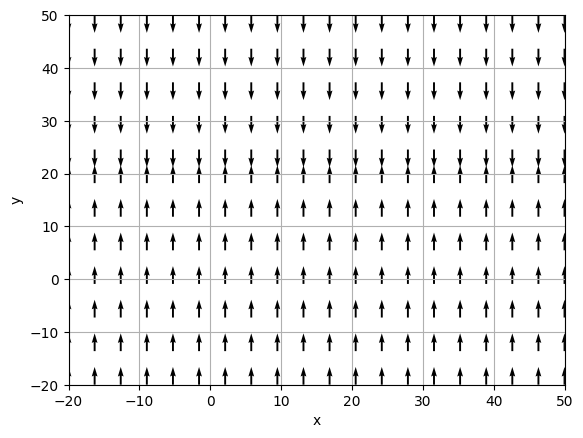

In [531]:
# definimos las variables a analizar y su intervalo a analizar con meshgrid y linspace de numpy
X,Y=np.meshgrid(np.linspace(-20,50,20), np.linspace(-20,50,12)) # Formato de linspace es (limite izquierdo, limite derecho, {opcional: cantidad de puntos})

U = 1.0
V = ((A/(p*c*v))*(e*o*((20 + 273)**4 - (Y + 273)**4) + h*(20 - Y))) #f(x,y), definimos la edo

N = np.sqrt(U ** 2 + V ** 2)# Normalizamos los vectores, ya que queremos saber los sentidos, no queremos los largos de los vectores
# al obtener la normalizacion se debe de dividir con los vectores, para asi terminar con la normalizacion
U = U / N
V = V / N

# invocamos plt para graficar los vectores
plt.quiver(X, Y, U, V) #graficamos los vectores con origen en (x,y) y término en la normalizacion (u,v)
plt.xlim([-20,50]) #limites en eje x
plt.ylim([-20,50]) #limites en eje y

plt.xlabel('x') #etiqueta eje x
plt.ylabel('y') #etiqueta eje y
plt.grid()# para establecer red en la región

# mostramos el grafico
plt.show()